<a href="https://colab.research.google.com/github/JorgeZarama/MatematicaIA/blob/main/determinante_recursivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

Nombres:<br>
Daniel Velasquez Castro<br>
Jorge Andrés Zarama Benavides<br>
Grupo: 66

## a. Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.


In [ ]:
def determinante_recursivo(matriz):
    nueva_matriz = np.array(matriz, dtype=float)

    #Para poder aplicar la definición recursiva de laplace vamos a garantizar que sea una matriz cuadrada
    if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
      return print("Esta no es una matriz cuadrada")

    #Como vamos a implementar una función recursiva definimos el caso base
    #matriz 1x1
    if len(nueva_matriz) == 1:
        return nueva_matriz[0][0]

    # Inicializar el determinante
    det = 0.0
    for j in range(len(nueva_matriz[0])):

        # Calcular el cofactor
        cofactor = (-1) ** (j) * nueva_matriz[0][j] * determinante_recursivo(submatriz(nueva_matriz, 0, j))
        # Sumar el cofactor al determinante
        det += cofactor
    return det


def submatriz(nueva_matriz, i, j):

    # Retorna la submatriz al eliminar la fila i y la columna j de una matriz.
    sub = np.delete(nueva_matriz, i, axis=0)  # Eliminar la fila i
    sub = np.delete(sub, j, axis=1)  # Eliminar la columna j
    return sub


Realizamos las respectivas pruebas

In [ ]:
matriz = [(1,2,3),(3,2,0),(2,1,3)]
matriz2 = [(1,2,3,4),(3,2,0,1),(2,1,3,2),(2,1,1,2)]
print(determinante_recursivo(matriz))
print(determinante_recursivo(matriz2))

-15.0
-18.0


##b. Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta.


In [ ]:
#Si, para esto creamos una función que se llama matriz_triangular la cual primero revisa si la matriz es triangular inferior o superior
#y si se cumple alguno de estos casos la función procederá a calcular el determinando multiplicando los números de la diagonal principal

def matriz_triangular(matriz):
  nueva_matriz = np.array(matriz, dtype=float)

  #Para garantizar que sea una matriz cuadrada
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
      return print("Esta no es una matriz cuadrada")
  factor = nueva_matriz.shape[1]

# Incicializamos algunas variables
  triangular_s = 1
  triangular_i = 1

# Revisamos si la matriz es triangular superior
  for i in range(factor-1):
     if np.sum(nueva_matriz[i][i+1:], axis=0) != 0:
      triangular_s = 0
      break

# Revisamos si la matriz es triangular inferior
  for i in range(factor-1):
    if np.sum(nueva_matriz[factor-i-1][:factor-i-1], axis=0) != 0:
      triangular_i = 0
      break

 # Si es triangular inferior o superiro calculamos su determinante como la multiplización de la diagonal
  if triangular_s == 1 or triangular_i == 1:
    determinante = 1
    for i in range(factor):
      determinante *= nueva_matriz[i][i]
    return determinante

#Si la matriz no es triangular procedemos a calcular el determinante utilizando la primer función implementada

  if triangular_s == 0 and triangular_i == 0:
   print("Esta matriz no es triangular superior o inferior")
   #si no es triangular superior o inferior calculamos el determinante con la función de definición recursiva de Laplace
   #print("Este es el determinanate calculado con definición recursiva de Laplace: ",determinante_recursivo(matriz))
   return determinante_recursivo(matriz)



In [ ]:
matriz1 = [(1,2,0),(3,2,0),(2,1,3)]
matriz2 = [(1,0,0),(3,2,0),(2,1,3)]
print("determinante cálculado como matriz triangular",matriz_triangular(matriz1))
print("----------")
print("determinante cálculado como matriz triangular",matriz_triangular(matriz2))
print("----------")
print("determinante recursivo",determinante_recursivo(matriz2))

Esta matriz no es triangular superior o inferior
determinante cálculado como matriz triangular -12.0
----------
determinante cálculado como matriz triangular 6.0
----------
determinante recursivo 6.0


##c. Determínese de forma justificada cómo alteran el determinante de una matriz n × n las dos operaciones elementales siguientes: Intercambiar una fila (o columna) por otra fila (o columna). Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α.

In [ ]:
def intercambiar_fila(lista, fila1, fila2):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  if fila1 > nueva_matriz.shape[0]-1 or fila2 > nueva_matriz.shape[0]-1:
    return print("El número de filas ingresado es mayor que el que la matriz tiene")
  nueva_matriz[[fila1, fila2],:] = nueva_matriz[[fila2, fila1],:]
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return

In [ ]:
lista = [(1,2,3,4),(3,2,0,1),(2,1,3,2),(2,1,2,2)]
intercambiar_fila(lista,0,1)
intercambiar_fila(lista,0,2)
intercambiar_fila(lista,0,3)
intercambiar_fila(lista,2,3)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 0. 1.]
 [2. 1. 3. 2.]
 [2. 1. 2. 2.]]
determinante matriz sin cambios:
-9.0
Esta es la nueva matriz:
 [[3. 2. 0. 1.]
 [1. 2. 3. 4.]
 [2. 1. 3. 2.]
 [2. 1. 2. 2.]]
determinante nueva matriz:
9.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 0. 1.]
 [2. 1. 3. 2.]
 [2. 1. 2. 2.]]
determinante matriz sin cambios:
-9.0
Esta es la nueva matriz:
 [[2. 1. 3. 2.]
 [3. 2. 0. 1.]
 [1. 2. 3. 4.]
 [2. 1. 2. 2.]]
determinante nueva matriz:
9.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 0. 1.]
 [2. 1. 3. 2.]
 [2. 1. 2. 2.]]
determinante matriz sin cambios:
-9.0
Esta es la nueva matriz:
 [[2. 1. 2. 2.]
 [3. 2. 0. 1.]
 [2. 1. 3. 2.]
 [1. 2. 3. 4.]]
determinante nueva matriz:
9.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 0. 1.]
 [2. 1. 3. 2.]
 [2. 1. 2. 2.]]
determinante matriz sin cambios:
-9.0
Esta es la nueva matriz:
 [[1. 2. 3. 4.]
 [3. 2. 0. 1.]
 [2. 1. 2. 2.]
 [2. 1. 3. 2.]]
determinante nueva matriz:
9.0


Se puede observar que para el nuevo determinante cambia su signo pero se mantiente su valor




In [ ]:
def intercambiar_columna(lista, columna1, columna2):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  if columna1 > nueva_matriz.shape[0]-1 or columna2 > nueva_matriz.shape[0]-1:
    return print("El número de columnas ingresado es mayor que el que la matriz tiene")

  nueva_matriz[:, [columna1, columna2]] = nueva_matriz[:, [columna2, columna1]]
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return


In [ ]:

lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 3, 1), (2, 1, 3, 3)]
intercambiar_columna(lista,0,1)
intercambiar_columna(lista,0,2)
intercambiar_columna(lista,0,3)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[2. 1. 3. 4.]
 [2. 3. 1. 2.]
 [1. 2. 3. 1.]
 [1. 2. 3. 3.]]
determinante nueva matriz:
24.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[3. 2. 1. 4.]
 [1. 2. 3. 2.]
 [3. 1. 2. 1.]
 [3. 1. 2. 3.]]
determinante nueva matriz:
24.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[4. 2. 3. 1.]
 [2. 2. 1. 3.]
 [1. 1. 3. 2.]
 [3. 1. 3. 2.]]
determinante nueva matriz:
24.0


Se puede observar que para el nuevo determinante cambia su signo pero se mantiente su valor

In [ ]:
def sumar_columna(lista, columna1, columna2):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  if columna1 > nueva_matriz.shape[0]-1 or columna2 > nueva_matriz.shape[0]-1:
    return print("El número de columnas ingresado es mayor que el que la matriz tiene")
  primera_columna = nueva_matriz[:, columna1]
  segunda_columna = nueva_matriz[:, columna2]
  suma_columnas = primera_columna + segunda_columna
  nueva_matriz[:, columna1] = suma_columnas
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return


In [ ]:
lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 3, 1), (2, 1, 3, 3)]
sumar_columna(lista,0,1)
sumar_columna(lista,0,2)
sumar_columna(lista,0,3)
sumar_columna(lista,2,3)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[3. 2. 3. 4.]
 [5. 2. 1. 2.]
 [3. 1. 3. 1.]
 [3. 1. 3. 3.]]
determinante nueva matriz:
-24.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[4. 2. 3. 4.]
 [4. 2. 1. 2.]
 [5. 1. 3. 1.]
 [5. 1. 3. 3.]]
determinante nueva matriz:
-24.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[5. 2. 3. 4.]
 [5. 2. 1. 2.]
 [3. 1. 3. 1.]
 [5. 1. 3. 3.]]
determinante nueva matriz:
-24.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 3. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-24.0
Esta es la nueva matriz:
 [[1. 2. 7. 4.]
 [3. 2. 3. 2.]
 [2. 1. 4. 1.]
 [2. 1. 6. 3.]]
determinante nueva matriz:
-24.0


Se puede observar que para el nuevo determinante es el mismo para el caso de suma de columnas

In [ ]:
def sumar_filas(lista, fila1, fila2):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  if fila1 > nueva_matriz.shape[0]-1 or fila2 > nueva_matriz.shape[0]-1:
    return print("El número de columnas ingresado es mayor que el que la matriz tiene")
  primera_fila = nueva_matriz[fila1,:]
  segunda_fila = nueva_matriz[fila2,:]
  suma_filas = primera_fila + segunda_fila
  nueva_matriz[fila1,:] = suma_filas
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return


In [ ]:
lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 4, 1), (2, 1, 3, 3)]
sumar_filas(lista,0,1)
sumar_filas(lista,0,2)
sumar_filas(lista,0,3)
sumar_filas(lista,2,3)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[4. 4. 4. 6.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-34.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[3. 3. 7. 5.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-34.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[3. 3. 6. 7.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-34.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [4. 2. 7. 4.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-34.0


Se puede observar que para el nuevo determinante es el mismo para el caso de suma de filas

In [ ]:
def multiplicar_escalar(lista, escalar):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  nueva_matriz = nueva_matriz * escalar
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return

In [ ]:
lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 4, 1), (2, 1, 3, 3)]
multiplicar_escalar(lista,2)
multiplicar_escalar(lista,3)
multiplicar_escalar(lista,4)
multiplicar_escalar(lista,5)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[2. 4. 6. 8.]
 [6. 4. 2. 4.]
 [4. 2. 8. 2.]
 [4. 2. 6. 6.]]
determinante nueva matriz:
-544.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[ 3.  6.  9. 12.]
 [ 9.  6.  3.  6.]
 [ 6.  3. 12.  3.]
 [ 6.  3.  9.  9.]]
determinante nueva matriz:
-2754.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[ 4.  8. 12. 16.]
 [12.  8.  4.  8.]
 [ 8.  4. 16.  4.]
 [ 8.  4. 12. 12.]]
determinante nueva matriz:
-8704.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[ 5. 10. 15. 20.]
 [15. 10.  5. 10.]
 [10.  5. 20.  5.]
 [10.  5. 15. 15.]]
determinante nueva m

Se evidencia la sigueinte relación det(kA) = k^n * det(A)<br>
Para nuestro caso det(A) = -34 <br>
para k = 2, det = 2^4 * (-34) = -544<br>
para k = 3, det = 3^4 * (-34) = -2754<br>
para k = 4, det = 4^4 * (-34) = -8704<br>
para k = 5, det = 5^4 * (-34) = -21250<br>


In [ ]:
def multiplicar_escalar_fila(lista, escalar, fila):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(nueva_matriz))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  nueva_matriz[fila,:] = nueva_matriz[fila,:] * escalar

  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return


In [ ]:
lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 4, 1), (2, 1, 3, 3)]
multiplicar_escalar_fila(lista,2,2)
multiplicar_escalar_fila(lista,3,1)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [4. 2. 8. 2.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-68.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[1. 2. 3. 4.]
 [9. 6. 3. 6.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante nueva matriz:
-102.0


Se evidencia la sigueinte relación det(k*filaA) = k * det(A)<br>

In [ ]:
def sumar_filas_escalar(lista, fila1, fila2, escalar):
  nueva_matriz = np.array(lista, dtype=float)
  print("matriz sin cambios\n",  nueva_matriz)
  print("determinante matriz sin cambios:")
  print(determinante_recursivo(lista))
  if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
    return print("Esta no es una matriz cuadrada")
  if fila1 > nueva_matriz.shape[0]-1 or fila2 > nueva_matriz.shape[0]-1:
    return print("El número de fila ingresado es mayor que el que la matriz tiene")
  primera_fila = nueva_matriz[fila1,:] * escalar
  nueva_matriz[fila2,:] = nueva_matriz[fila2,:] - primera_fila
  print("Esta es la nueva matriz:\n",nueva_matriz)
  print("determinante nueva matriz:")
  print(determinante_recursivo(nueva_matriz))
  return


In [ ]:
lista = [(1, 2, 3, 4), (3, 2, 1, 2), (2, 1, 4, 1), (2, 1, 3, 3)]
sumar_filas_escalar(lista,0,1,2)
sumar_filas_escalar(lista,0,2,3)
sumar_filas_escalar(lista,0,3,4)

matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[ 1.  2.  3.  4.]
 [ 1. -2. -5. -6.]
 [ 2.  1.  4.  1.]
 [ 2.  1.  3.  3.]]
determinante nueva matriz:
-34.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[  1.   2.   3.   4.]
 [  3.   2.   1.   2.]
 [ -1.  -5.  -5. -11.]
 [  2.   1.   3.   3.]]
determinante nueva matriz:
-34.0
matriz sin cambios
 [[1. 2. 3. 4.]
 [3. 2. 1. 2.]
 [2. 1. 4. 1.]
 [2. 1. 3. 3.]]
determinante matriz sin cambios:
-34.0
Esta es la nueva matriz:
 [[  1.   2.   3.   4.]
 [  3.   2.   1.   2.]
 [  2.   1.   4.   1.]
 [ -2.  -7.  -9. -13.]]
determinante nueva matriz:
-34.0


Trabajamos el caso en el cual se resta a una fila otra de la misma matriz multiplicada por un escalar, este caso lo veremos despues para los cálculos de eliminación de Gauss con pivoteo parcial. Vemos que cuando restamos a una fila de la matriz otra multiplicada por un escalar, el determinante no cambia.

##d) Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.


In [ ]:
def eliminacion_gauss_pivoteo_parcial(matriz):

    # Aplica el método de eliminación de Gauss con pivoteo parcial para escalonar una matriz.
    # Convertir la matriz a un arreglo NumPy de tipo float ya que las divisiones harían que ya no sean enteros
    nueva_matriz = np.array(matriz, dtype=float)
    n = len(matriz)  # Factor n de la Matriz

    for i in range(n-1):
        # Pivoteo parcial: buscar el elemento pivote máximo en valor absoluto (función abs de nunpy) y su índice en la columna actual
        max_idx = np.argmax(np.abs(nueva_matriz[i:, i])) + i
        # Realizó el intercambio de filas dejando la que contiene el mayor valor (valor absoluto) en la primera fila
        nueva_matriz[[i, max_idx]] = nueva_matriz[[max_idx, i]]

        # Eliminación gaussiana en las filas siguientes
        for j in range(i+1, n):
            #Encontramos el valor del escalar que nos permitirá establecer en cero los factores debajo de la columna del mayor factor elejido
            factor = nueva_matriz[j, i] / nueva_matriz[i, i]
            #Establecemos en cero los valores de la columna por debajo del valor mas grande elegido
            nueva_matriz[j, i:] -= factor * nueva_matriz[i, i:]
    return nueva_matriz


In [ ]:
matriz = [(1, 2, -1, 1), (2, 2, 1, 8), (3, 3, 2, 7), (4, 3, 1, 2)]
print("Matriz diagonalizada \n",eliminacion_gauss_pivoteo_parcial(matriz))
print("Cálculo del determinate utilizando la función recursiva a la matriz diagonal: ",round(determinante_recursivo(eliminacion_gauss_pivoteo_parcial(matriz)),0))
print("Cálculo del determinate utilizando la función recursiva: ",determinante_recursivo(matriz))
print("Cálculo del determinate utilizando la función para matrices triangulares: ",round(matriz_triangular(eliminacion_gauss_pivoteo_parcial(matriz)),0))


Matriz diagonalizada 
 [[ 4.    3.    1.    2.  ]
 [ 0.    1.25 -1.25  0.5 ]
 [ 0.    0.    2.    5.2 ]
 [ 0.    0.    0.    4.2 ]]
Cálculo del determinate utilizando la función recursiva a la matriz diagonal:  42.0
Cálculo del determinate utilizando la función recursiva:  42.0
Cálculo del determinate utilizando la función para matrices triangulares:  42.0


##e. ¿Cómo se podría calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes? Implementa una nueva función, determinante gauss, que calcule el determinante de una matriz utilizando eliminación gaussiana.


In [ ]:
def eliminacion_gauss_pivoteo_parcial_determinante(matriz):

    # Aplica el método de eliminación de Gauss con pivoteo parcial para escalonar una matriz.
    # Convertir la matriz a un arreglo NumPy de tipo float ya que las divisiones harían que ya no sean enteros
    nueva_matriz = np.array(matriz, dtype=float)
    n = len(matriz)  # Factor n de la Matriz
    cambio = 0
    for i in range(n-1):
        # Pivoteo parcial: buscar el elemento pivote máximo en valor absoluto (función abs de nunpy) y su índice en la columna actual
        max_idx = np.argmax(np.abs(nueva_matriz[i:, i])) + i
        # Realizó el intercambio de filas dejando la que contiene el mayor valor (valor absoluto) en la primera fila
        if max_idx != i:
          cambio += 1
        nueva_matriz[[i, max_idx]] = nueva_matriz[[max_idx, i]]

        # Eliminación gaussiana en las filas siguientes
        for j in range(i+1, n):
            #Encontramos el valor del escalar que nos permitirá establecer en cero los factores debajo de la columna del mayor factor elejido
            factor = nueva_matriz[j, i] / nueva_matriz[i, i]
            #Establecemos en cero los valores de la columna por debajo del valor mas grande elegido
            nueva_matriz[j, i:] -= factor * nueva_matriz[i, i:]
    cofactor = (-1) ** (cambio)
    determinante = cofactor * matriz_triangular(nueva_matriz)
    return determinante

In [ ]:
#Realizamos las respectivas pruebas:
matriz = [(-2, 2, -1, 1), (2, 2, 1, 8), (-3, 3, 2, 6), (1, 3, 1, 2)]
matriz2 = [(1, 0, 0, 1), (2, 1, 1, 8), (2, 3, 2, 6), (1, 2, 1, 2)]
matriz3 = [(1, 1, 2, 1, 2), (2, 1, 2, 8, 4), (2, 3, 2, 6, 3), (2, 3, 1, 2, 1),(1, 0, 0, 1, 2)]
print(round(eliminacion_gauss_pivoteo_parcial_determinante(matriz),0))
print(determinante_recursivo(matriz))
print(round(eliminacion_gauss_pivoteo_parcial_determinante(matriz2),0))
print(determinante_recursivo(matriz2))
print(round(eliminacion_gauss_pivoteo_parcial_determinante(matriz3),0))
print(determinante_recursivo(matriz3))


200.0
200.0
-3.0
-3.0
-42.0
-42.0


##f. Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.




*   Complejidad computacional asociada al cálculo del determinante con la definición recursiva:

Analizamos la complejidad asociada a esta función que se compone en realidad por dos funciones de la siguiente manera:
<br><br>
La función determinante_recursivo es una implementación recursiva del cálculo del determinante de una matriz cuadrada. Para cada llamada recursiva, se genera una submatriz más pequeña eliminando una fila y una columna de la matriz original. La función submatriz se encarga de generar la submatriz correspondiente.
<br><br>
El caso base ocurre cuando la matriz es de tamaño 1x1, donde se retorna el único elemento de la matriz.
<br>
En cada nivel recursivo, se realiza un bucle for que itera sobre los elementos de la primera fila de la matriz y calcula el cofactor correspondiente multiplicado por el determinante de la submatriz. Luego, se suma el cofactor al determinante acumulado.
<br>


    for j in range(len(nueva_matriz[0])):
        cofactor = (-1) ** (j) * nueva_matriz[0][j] * determinante_recursivo(submatriz(nueva_matriz, 0, j))
        # Sumar el cofactor al determinante
        det += cofactor
    return det

La función submatriz utiliza la función np.delete para eliminar una fila y una columna de la matriz, lo cual tiene una complejidad de O(n^2), donde n es el tamaño de la matriz.
<br>

     def submatriz(nueva_matriz, i, j):<br>
        sub = np.delete(nueva_matriz, i, axis=0)  # Eliminar la fila i<br>
        sub = np.delete(sub, j, axis=1)  # Eliminar la columna j<br>
        return sub<br>

En resumen, si n es el tamaño de la matriz cuadrada original, la complejidad computacional de la función determinante_recursivo puede aproximarse a O(n!) o O(n^n), debido a que en cada llamada recursiva se generan n submatrices más pequeñas.
<br>
<br>



*   Complejidad computacional asociada al cálculo por el método de eliminación de Gauss con pivoteo parcial:

la función eliminacion_gauss_pivoteo_parcial_determinante lo analizamos de la siguiente manera:
<br><br>
La función eliminacion_gauss_pivoteo_parcial_determinante realiza el método de eliminación de Gauss con pivoteo parcial para obtener la forma escalonada de una matriz y calcular su determinante.
<br><br>

    nueva_matriz = np.array(matriz, dtype=float)
    n = len(matriz)  # Factor n de la Matriz
    cambio = 0
    for i in range(n-1):
        # Pivoteo parcial: buscar el elemento pivote máximo en valor absoluto (función abs de nunpy) y su índice en la columna actual
        max_idx = np.argmax(np.abs(nueva_matriz[i:, i])) + i
        # Realizó el intercambio de filas dejando la que contiene el mayor valor (valor absoluto) en la primera fila
        if max_idx != i:
          cambio += 1
        nueva_matriz[[i, max_idx]] = nueva_matriz[[max_idx, i]]

        # Eliminación gaussiana en las filas siguientes
        for j in range(i+1, n):
            #Encontramos el valor del escalar que nos permitirá establecer en cero los factores debajo de la columna del mayor factor elejido
            factor = nueva_matriz[j, i] / nueva_matriz[i, i]
            #Establecemos en cero los valores de la columna por debajo del valor mas grande elegido
            nueva_matriz[j, i:] -= factor * nueva_matriz[i, i:]
    cofactor = (-1) ** (cambio)
    determinante = cofactor * matriz_triangular(nueva_matriz)

La función también utiliza la función matriz_triangular para verificar si la matriz es triangular y calcular el determinante en ese caso.

    def matriz_triangular(matriz):
      nueva_matriz = np.array(matriz, dtype=float)

      if nueva_matriz.shape[0]!= nueva_matriz.shape[1]:
      return print("Esta no es una matriz cuadrada")
      factor = nueva_matriz.shape[1]

      triangular_s = 1
      triangular_i = 1
      for i in range(factor-1):
        if np.sum(nueva_matriz[i][i+1:], axis=0) != 0:
        triangular_s = 0
        break
      for i in range(factor-1):
        if np.sum(nueva_matriz[factor-i-1][:factor-i-1], axis=0) != 0:
        triangular_i = 0
        break

      if triangular_s == 1 or triangular_i == 1:
        determinante = 1
        for i in range(factor):
        determinante *= nueva_matriz[i][i]
        return determinante
      if triangular_s == 0 and triangular_i == 0:
        print("Esta matriz no es triangular superior o inferior")
        return determinante_recursivo(matriz)
<br>

En el peor de los casos, la función recorre la matriz mediante dos bucles for. El bucle externo itera n-1 veces, donde n es el número de filas (o columnas) de la matriz. El bucle interno itera n-i veces en cada iteración del bucle externo. Dentro de este bucle, se realiza el pivoteo parcial y la eliminación gaussiana, que implica operaciones de asignación y resta de vectores.
<br><br>
Por lo tanto, la complejidad del algoritmo de eliminación de Gauss con pivoteo parcial en este caso es aproximadamente O(n^3), ya que se realizan operaciones básicas de asignación y resta en cada iteración del bucle interno. El número de iteraciones es proporcional a n en el peor caso, y cada iteración implica operaciones en un subconjunto de la matriz.
<br><br>
La función matriz_triangular realiza algunas comprobaciones y cálculos adicionales para determinar si la matriz es triangular superior o inferior y calcular su determinante en ese caso. Estas operaciones tienen una complejidad aproximada de O(n^2), ya que se recorren las filas y columnas de la matriz.
<br><br>
En resumen, la complejidad computacional de la función eliminacion_gauss_pivoteo_parcial_determinante es O(n^3), mientras que la complejidad de la función matriz_triangular es O(n^2).

##g. Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ R n×n, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecuciónn asociado a cada una de las variantes siguientes interpretando los resultados:

##Utilizando determinante recursivo.
##Empleando determinante gauss.
##Haciendo uso de la función preprogramada numpy.linalg.det.


In [ ]:
#Se generan dos matrices para almacenar los tiempos y tamaños de matrices que utilizan los 3 métodos para obtener el determinante
import time

#Matrices que guardan los tiempos empleados y el tamaño correspondiente (2<=n=<10)
tiempos=np.zeros((11,3))
tamano=np.zeros((11,3))


for tt in range(2,11):
    x=tt
    mat=np.random.randn(x,x)
    time1=time.time()
    np.linalg.det(mat)
    time2=time.time()
    tiempos[tt][0]=time2-time1
    tamano[tt][0]=x

    time3=time.time()
    determinante_recursivo(mat)
    time4=time.time()
    tiempos[tt][1]=time4-time3
    tamano[tt][1]=x

    time5=time.time()
    eliminacion_gauss_pivoteo_parcial_determinante(mat)
    time6=time.time()
    tiempos[tt][2]=time6-time5
    tamano[tt][2]=x

print(tiempos)
print(tamano)

Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
Esta matriz no es triangular superior o inferior
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.87873840e-04 1.31368637e-04 1.89065933e-04]
 [4.38690186e-05 2.22921371e-04 1.67369843e-04]
 [3.45706940e-05 1.38330460e-03 2.30407715e-03]
 [6.58035278e-05 4.83727455e-03 1.03390217e-02]
 [8.53538513e-05 2.89580822e-02 1.82268620e-02]
 [9.10758972e-05 1.10663176e-01 1.34387970e-01]
 [8.15391541e-05 8.49195004e-01 1.28537393e+00]
 [8.15391541e-05 1.59682910e+01 1.63065095e+01]
 [7.74860382e-05 8.60774691e+01 8.80290158e+01]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]
 [ 7.  7.  7.]
 [ 8.  8

In [ ]:
#Se eliminan las primeras filas porque solo se obtiene el determinante para matrices con 2<n<10
tamano=np.delete(tamano,(0),axis=0)
tamano=np.delete(tamano,(0),axis=0)
tiempos=np.delete(tiempos,(0),axis=0)
tiempos=np.delete(tiempos,(0),axis=0)

#Se muestran los tiempos promedio en ms para tipo de función
print("Promedio en ms con función Numpy: ", np.mean(tiempos,axis=0)[0])
print("Promedio en ms con Determinante recursivo: ", np.mean(tiempos,axis=0)[1])
print("Promedio en ms con Eliminación de Gauss: ", np.mean(tiempos,axis=0)[2])

Promedio en ms con función Numpy:  8.323457505967881e-05
Promedio en ms con Determinante recursivo:  11.449016809463501
Promedio en ms con Eliminación de Gauss:  11.754057062996758


En la siguiente sección se generan las gráficas del tiempo empleado por cada tipo de función según el tamaño de la matriz (nxn). Se puede observar que el tiempo empleado por la función de Numpy es muy inferior al requerido por las funciones desarrolladas.

Text(0.5, 0, 'Tamaño de la matriz (n)')

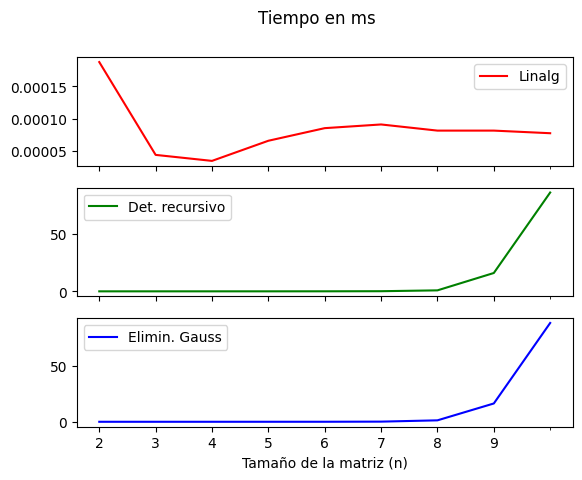

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Se genera un DataFrame para visualizar los tiempos de cada tipo de función
nueva=pd.DataFrame(tiempos, columns=["Linalg","Det. recursivo","Elimin. Gauss"], index=range(2,11))
nueva.plot(style=['r-','g-','b-'], xticks=range(2,10), title='Tiempo en ms', subplots=True)
plt.xlabel('Tamaño de la matriz (n)')

Se adjunta una imagen del resultado en el caso de que no se ejecuten todos los segmentos de código

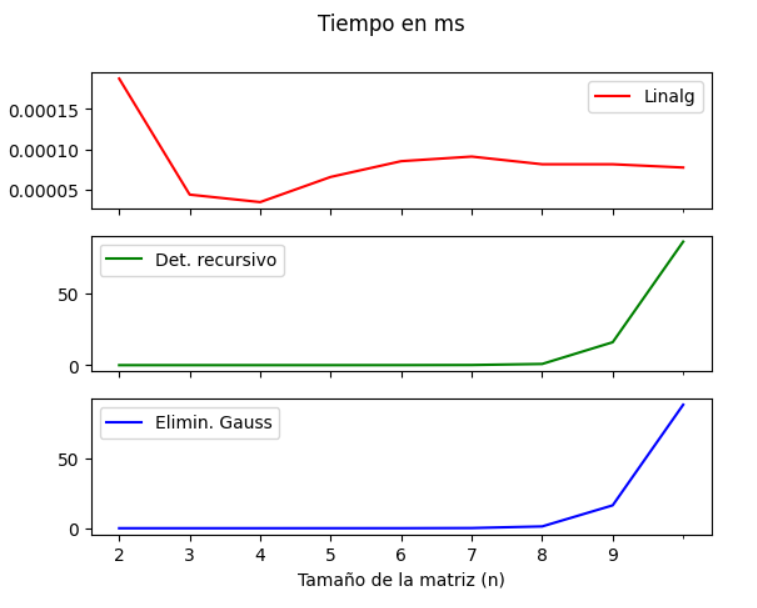

# 2. En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.

## a) Prográmese en Python el método de descenso de gradiente para funciones de n variables.

In [ ]:
#Función para obtener el gradiente
def grad_f(list):
    resultado=[]
    for g in list:
        if g[1]==0:
            resultado.append((0,0))
        else:
            factor=g[0]*g[1]
            exponente=g[1]-1
            resultado.append((factor,exponente))
    return resultado

#Se realiza la prueba con la ecuación f(x) = 3x4 + 4x3 − 12x2 + 7
ecuacion=((3,4),(4,3),(-12,2),(7,0))
grad_f(ecuacion)

[(12, 3), (12, 2), (-24, 1), (0, 0)]

La siguiente función permite obtener el valor en el que el gradiente es aproximadamente 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#función para obtener el descendiente del gradiente
def desce_grad(funcion,val_ini, rat_apren, tol, maxit):

    X_res=np.empty((1))
    Y_res=np.empty((1))
    resultado=val_ini
    x=val_ini
    gra=grad_f(funcion)
    fun_y= lambda X: funcion[0][0]*X**funcion[0][1]+funcion[1][0]*X**funcion[1][1]+funcion[2][0]*X**funcion[2][1]+funcion[3][0]
    der= lambda X: gra[0][0]*X**gra[0][1]+gra[1][0]*X**gra[1][1]+gra[2][0]*X**gra[2][1]


    for num in range(maxit):

        x=x-(rat_apren*der(x))

        if np.isclose(der(x),0,atol=tol):
            print("Valor en y:",round(fun_y(x),0))
            print("Valor en x: ",round(x,0))
            print("Iteraciones: ", num, ". Radio de apren: ", rat_apren)
            return x

    print(f"No se encontró el mínimo en las f{maxit} iteraciones. ",x)

    return x


## b) Sea la función f : R → R dada por f(x) = 3x4 + 4x3 − 12x2 + 7.

### I. Aplica el método sobre f(x) con x0 = 3 γ = 0.001, tol=1e-12,maxit=1e5.

In [ ]:
ecuacion=((3,4),(4,3),(-12,2),(7,0))
desce_grad(ecuacion,3,0.001, 1e-12, 100000)

Valor en y: 2.0
Valor en x:  1.0
Iteraciones:  830 . Radio de apren:  0.001


1.0000000000000275

### II. Aplica de nuevo el método sobre f(x) con x0 = 3, γ = 0.01, tol=1e-12,maxit=1e5.

In [ ]:
ecuacion=((3,4),(4,3),(-12,2),(7,0))
desce_grad(ecuacion,3,0.01, 1e-12, 100000)

Valor en y: -25.0
Valor en x:  -2.0
Iteraciones:  30 . Radio de apren:  0.01


-1.9999999999999882

### III Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analíticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje γ?

**El radio de aprendizaje permite a la función ir realizando saltos en búsqueda del mínimo del gradiente con la posibilidad de que al realizar saltos muy grandes, la función no identifique que pasó por un mínimo local. Este efecto genera en este ejercicio, que para el primer caso con un γ = 0.001 se detectara el primer mínimo X=1, más cercano al punto de partida, pero al aumentar γ = 0.01, se saltó este mínimo local y siguió hasta encontrar al siguiente mínimo en X=-2**

### IV  Aplica nuevamente el m´etodo sobre f(x) con x0 = 3, γ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.

In [ ]:
desce_grad(ecuacion,3,0.1, 1e-12, 100000)

OverflowError: ignored

**Para el radio de aprendizaje γ = 0.1, se genera un error en la función debido a que los saltos son muy grandes y generan valores que están por fuera del rango para el tipo de datos utilizado. Esta situación permite identificar que el radio de aprendizaje debe estar en un rango que no requiera tantas iteraciones pero que tampoco sean muy grandes los saltos y desborde la búsqueda.**

### V. Finalmente, aplica el método sobre f(x) con x0 = 0, γ = 0.001, tol=1e-12, maxit=1e5. Interpreta el resultado y compéralo con el estudio analítico de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [ ]:
desce_grad(ecuacion,0,0.001, 1e-12, 100000)

**El resultado no es el esperado debido a que en el punto de partida se encuentra un máximo local (0,7), que al ser analizado por la función, encuentra que el resultado del gradiente es 0. para evitar estos problemas sería necesario analizar el punto es un mínimo o un máximo por medio de la segunda derivada de la función.**

## c) Sea la función g : R2 → R dada por g(x, y) = x2 + y3 + 3xy + 1.

### I.  Aplíquese el método sobre g(x, y) con x0 = (−1, 1), γ = 0.01,tol=1e-12, maxit=1e5.

In [ ]:
import matplotlib.pyplot as plt
import math

def des_grad(inicio, rat_apren, tol, maxit):
    fun_z=lambda x:  x[0]**2 + x[1]**3 +3*x[0]*x[1]+1
    der_fun= lambda x: [2*x[0] +  3*x[1], 3*x[1]**2 + 3*x[0]]
    match=0

    res=100
    rango=3
    X=np.linspace(-rango,rango,res)
    Y=np.linspace(-rango,rango,res)
    Z=np.zeros((res,res))
    for ix,x in enumerate(X):
        for iy,y in enumerate(Y):
            Z[ix,iy]=fun_z([x,y])

    plt.contourf(X,Y,Z,res)
    plt.colorbar()

    P=[0,0]
    P[0],P[1]=inicio[0],inicio[1]
    plt.plot(P[0],P[1],"o",c="red")

    for num in range(maxit):
        grad=der_fun(P)
        P[0],P[1]=P[0]-rat_apren*grad[0],P[1]-rat_apren*grad[1]
        plt.plot(P[0],P[1],"o",c="white")

        if math.isclose(grad[0],0, rel_tol=tol) and math.isclose(grad[1],0, rel_tol=tol):
                match=1
                print("Sí se encontró valor para: ",inicio, " en la iteración: ", num)
                print("Valor en x: ", P[0]," en y: ", P[1])
                plt.plot(P[0],P[1],"o",c="blue")
                break

    if match==0:
        print("No se encontró valor para: ", inicio)
        print("Se llegó al valor: (", round(P[0],2),",", round(P[1],2),")")

In [ ]:
des_grad((-1,1),0.01,1e-12,100000)

**La función no encontró el punto mínimo. La gráfica muestra con trazo de color blanco el recorrido.**

### II. ¿Qué ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultado deseable?

In [ ]:
des_grad((0,0),0.01,1e-12,10000)

**En este caso el punto de partida es el mínimo, por lo que en la primera iteración la función finaliza.**

### III. Realícese el estudio analítico de la función y utilícese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.

**Se identifica que es muy relevante la elección del punto partida como el radio de aprendizaje, de tal manera que permita de forma dinámica poder elegir diferentes puntos de partida pero también realizar los saltos con una distancia que permita ir recorriendo la función rápido si está lejos el punto mínimo, pero ir reduciendo la distancia entre saltos si se encuentra cerca el mínimo.**